# Installing and importing required libraries:

In [2]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install sklearn
%pip install nltk
%pip install spacy
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you 

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN,KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.manifold import TSNE

import nltk
#import spacy
#import re
nltk.download('punkt')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.decomposition import PCA  
from scipy.stats import zscore
nltk.download('punkt_tab')
from scipy.sparse import hstack
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


# Exploratory Data Analysis:

In [4]:
# Importing and coverting the dataset into a dataframe
df=pd.read_excel("Hollywood_tracks.xlsx")

In [5]:
# Preview of the dataset
df.head()

,index,Name,Artist,Genre,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Mode,Key,Duration_ms,release_date,is_english
0,0,Blister In The Sun,Violent Femmes,acoustic,71,0.3160,0.726,0.537,0.00000,0.0707,-8.896,0.1140,96.889,0.882,1,0,145706,1983-01-01,True
1,1,Love Song,Sara Bareilles,acoustic,73,0.0208,0.583,0.786,0.00000,0.1880,-3.142,0.0301,123.055,0.573,0,2,258826,2007-07-03,True
2,3,Hold On,Chord Overstreet,acoustic,77,0.4690,0.618,0.443,0.00000,0.0829,-9.681,0.0526,119.949,0.167,1,2,198853,2017-02-03,True
3,5,You Are the Best Thing,Ray LaMontagne,acoustic,67,0.0304,0.578,0.727,0.00002,0.1720,-4.872,0.0332,170.593,0.885,1,10,231840,2008-10-13,True
4,6,I Won't Give Up,Jason Mraz,acoustic,67,0.6940,0.483,0.303,0.00000,0.1150,-10.058,0.0429,133.406,0.139,1,4,240165,2012-04-13,True


In [6]:
# Just dropping unnecessary columns
df=df.drop(['index','is_english'],axis=1)

In [7]:
# Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13794 entries, 0 to 13793
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              13794 non-null  object 
 1   Artist            13794 non-null  object 
 2   Genre             13794 non-null  object 
 3   Popularity        13794 non-null  int64  
 4   Acousticness      13794 non-null  float64
 5   Danceability      13794 non-null  float64
 6   Energy            13794 non-null  float64
 7   Instrumentalness  13794 non-null  float64
 8   Liveness          13794 non-null  float64
 9   Loudness          13794 non-null  float64
 10  Speechiness       13794 non-null  float64
 11  Tempo             13794 non-null  float64
 12  Valence           13794 non-null  float64
 13  Mode              13794 non-null  int64  
 14  Key               13794 non-null  int64  
 15  Duration_ms       13794 non-null  int64  
 16  release_date      13794 non-null  object

#### Null Values

In [8]:
print('Count of null values:',df.isnull().sum().sum())

Count of null values: 0


#### Duplicated values

In [9]:
print('Count of duplicated values:')
df.duplicated().sum()

Count of duplicated values:


np.int64(8754)

#### Categorical columns:

In [10]:
print('Artist, genre, Mode and Key are the categorical columns.\n')
genres=df['Genre'].unique()
print("List of genres:\n",genres)
print("\nCount of genres:",df['Genre'].nunique())
print("\nList of unique values in mode are",df['Mode'].unique())
print('\nList of unique values in key are',df['Key'].unique())
print('\nNo of unique values in Artist are',df['Artist'].nunique())

Artist, genre, Mode and Key are the categorical columns.

List of genres:
 ['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro' 'electronic'
 'emo' 'folk' 'french' 'funk' 'garage' 'german' 'gospel' 'goth'
 'grindcore' 'groove' 'grunge' 'guitar' 'happy' 'hard-rock' 'hardcore'
 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk' 'house' 'idm' 'indian'
 'indie' 'indie-pop' 'industrial' 'iranian' 'j-dance' 'j-idol' 'j-pop'
 'j-rock' 'jazz' 'k-pop' 'kids' 'latin' 'latino' 'malay' 'mandopop'
 'metal' 'metalcore' 'minimal-techno' 'mpb' 'new-age' 'opera' 'pagode'
 'party' 'piano' 'pop' 'pop-film' 'power-pop' 'progressive-house'
 'psych-rock' 'punk' 'punk-rock' 'r-n-b' 'reggae' 'reggaeton' 'rock'
 'rock-n-roll' 'rock

#### Numerical Columns:

In [8]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables:', len(numerical_features))
df[numerical_features].head(2)

Number of numerical variables: 13


,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Mode,Key,Duration_ms
0,71,0.3160,0.726,0.537,0.0,0.0707,-8.896,0.1140,96.889,0.882,1,0,145706
1,73,0.0208,0.583,0.786,0.0,0.1880,-3.142,0.0301,123.055,0.573,0,2,258826


In [9]:
df.describe()

,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Mode,Key,Duration_ms
count,13794.000000,13794.000000,13794.000000,13794.000000,13794.000000,13794.000000,13794.000000,13794.000000,13794.000000,13794.000000,13794.000000,13794.000000,1.379400e+04
mean,64.303175,0.262671,0.579024,0.648000,0.137969,0.183070,-8.224556,0.077675,122.826659,0.498532,0.635059,5.347832,2.167082e+05
std,16.442691,0.319897,0.174070,0.252896,0.292506,0.152333,5.433831,0.080799,28.899176,0.258976,0.481431,3.556048,7.556606e+04
min,2.000000,0.000001,0.000000,0.000020,0.000000,0.015700,-43.938000,0.000000,0.000000,0.000000,0.000000,0.000000,3.096500e+04
25%,55.000000,0.009200,0.467000,0.473750,0.000000,0.093000,-10.050000,0.035000,101.814000,0.288000,0.000000,2.000000,1.708900e+05
50%,66.000000,0.099250,0.592000,0.697000,0.000099,0.121000,-6.655000,0.048100,123.046000,0.496500,1.000000,6.000000,2.094890e+05
75%,77.000000,0.466000,0.705000,0.862000,0.037900,0.222000,-4.804000,0.081175,139.933000,0.709000,1.000000,8.000000,2.448795e+05
max,97.000000,0.996000,0.980000,1.000000,0.999000,0.984000,1.221000,0.947000,235.907000,0.985000,1.000000,11.000000,1.400000e+06


In [11]:
# Convert the date column to datetime
df['release_date'] = pd.to_datetime(df['release_date'],format='ISO8601')

# Extract the year 
df['Release_Year'] = df['release_date'].dt.year


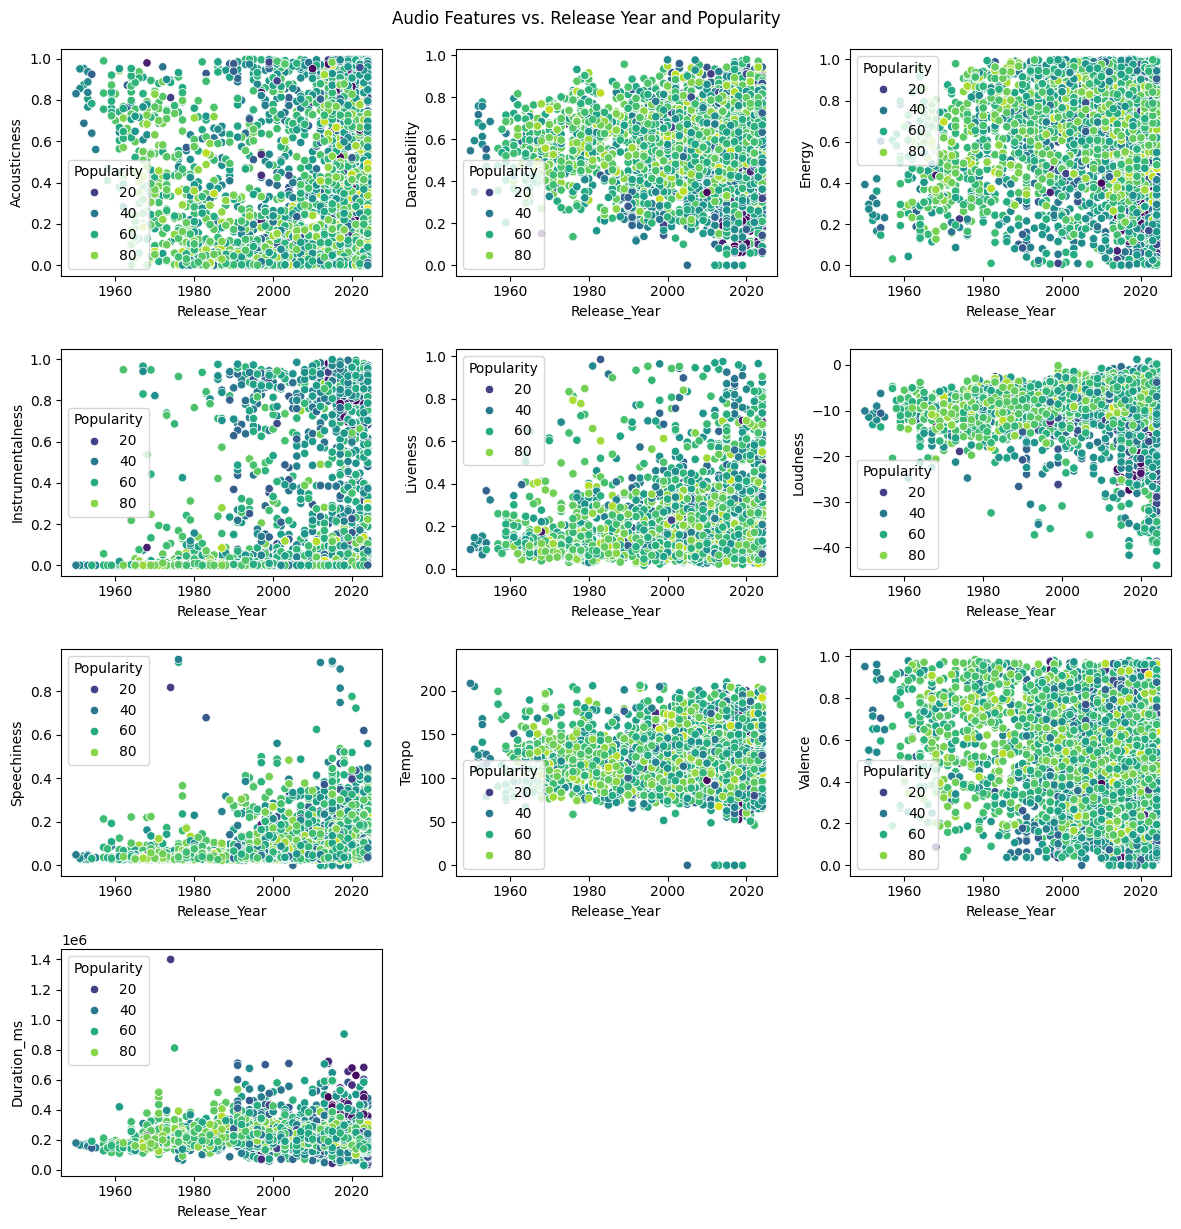

In [12]:
# Define the audio features
features = ['Acousticness', 'Danceability',
        'Energy', 'Instrumentalness', 'Liveness', 'Loudness',
       'Speechiness', 'Tempo', 'Valence','Duration_ms']

plt.figure(figsize=(12,12))
# Plot each feature against Popularity and Release Year
for i, feature in enumerate(features,start=1):
    plt.subplot(4,3,i)
    sns.scatterplot(x='Release_Year', y=feature, hue='Popularity', data=df, palette='viridis')
    
plt.tight_layout()
plt.suptitle('Audio Features vs. Release Year and Popularity', y=1.02)
plt.show()


+ The graph illustrates the changes in audio feature popularity over the years.
+ For instance, acousticness scores between 0 and 0.6 have consistently been popular.
+ Danceability scores in the range of 0.4 to 0.8 have remained popular over time.
+ The popularity of energy scores above 0.4 has been increasing over the years.
+ Loudness levels between 0 and -10 dB are notably popular, as indicated by their consistently low values.
+ Songs with moderate speechiness have seen a rise in popularity over the years.

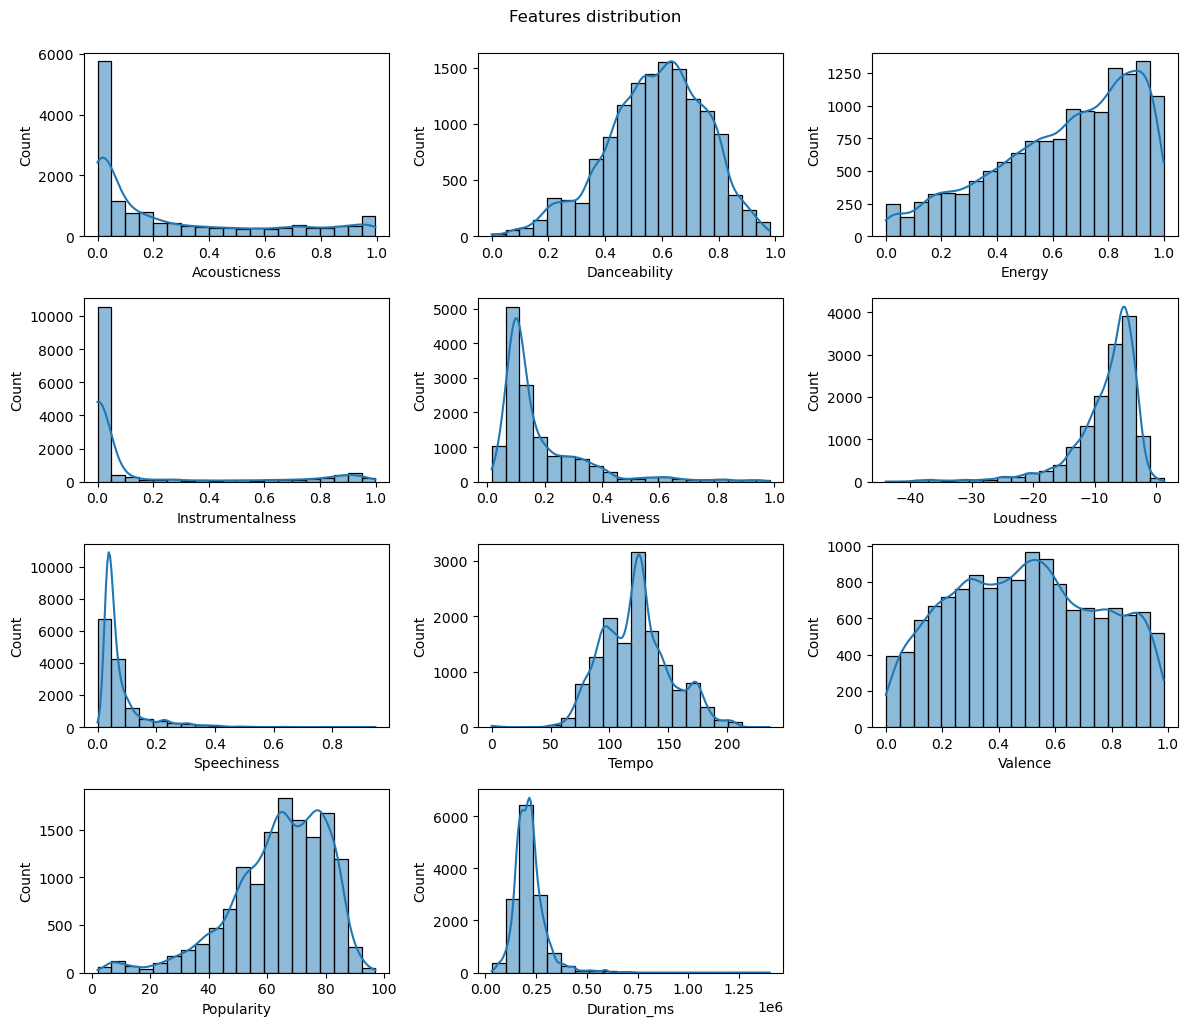

In [238]:
# Feature distributions
features = ['Acousticness', 'Danceability',
        'Energy', 'Instrumentalness', 'Liveness', 'Loudness',
       'Speechiness', 'Tempo', 'Valence','Popularity','Duration_ms']

plt.figure(figsize=(12,12))
# Plot each feature against Popularity and Release Year
for i, feature in enumerate(features,start=1):
    plt.subplot(5,3,i)
    sns.histplot(df[feature], bins=20,kde=True)
    
plt.tight_layout()
plt.suptitle('Features distribution', y=1.02)
plt.show()

The above graphs show the feature distribution.  
As we can see some of the features are right skewed like acousticness, instrumentalness, liveness,speechiness and some of them are slightly left skewed like danceability, energy, popularity.  
Some of the features are slight normal distributions like tempo, duration_ms, valence.

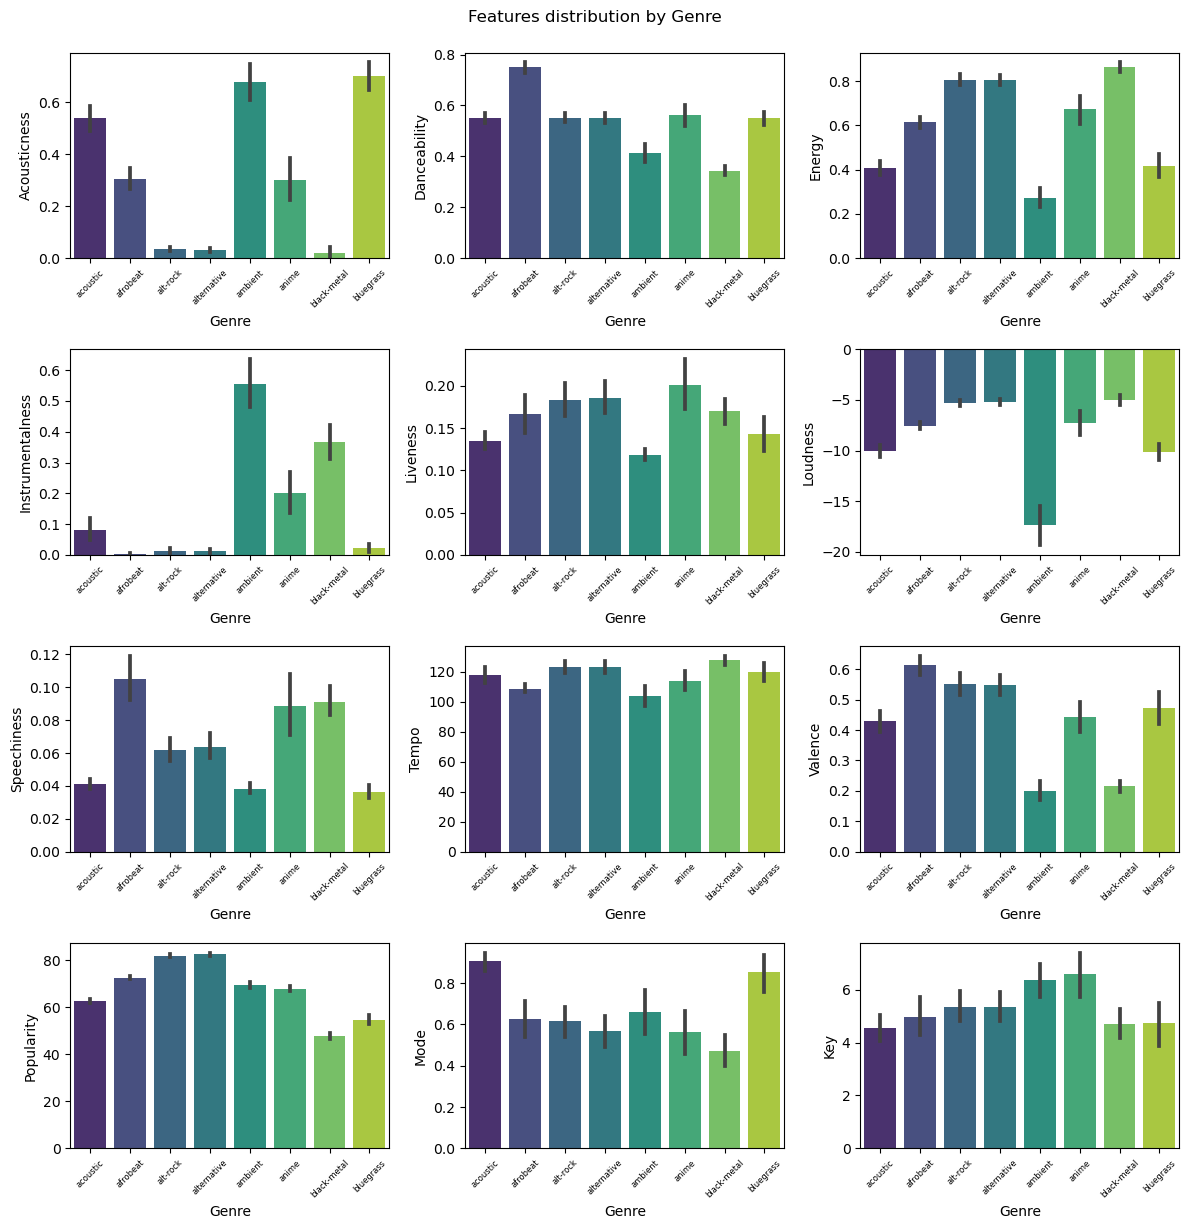

In [73]:
# Genre vs all the features
features = ['Acousticness', 'Danceability',
        'Energy', 'Instrumentalness', 'Liveness', 'Loudness',
       'Speechiness', 'Tempo', 'Valence','Popularity','Mode','Key']
plt.figure(figsize=(12,12))

for i, feature in enumerate(features,start=1):
    plt.subplot(4,3,i)
    sns.barplot(data=df.iloc[:1000,:], x='Genre', y=feature, palette='viridis')
    plt.xticks(rotation=45,fontsize=6)
plt.tight_layout()
plt.suptitle('Features distribution by Genre',y=1.02)
plt.show()

The above graph shows how the features distributed by genres.  
We have just taken first 10 genres.   
We can conclude:    
The tempo is kind of similar for all the 10 genres.  
Instrumentalness changing drastically for different genres etc.  

In [4]:
corr=df[['Popularity', 'Acousticness', 'Danceability',
       'Duration_ms', 'Energy', 'Instrumentalness', 'Liveness', 'Loudness',
       'Speechiness', 'Tempo', 'Valence']].corr()

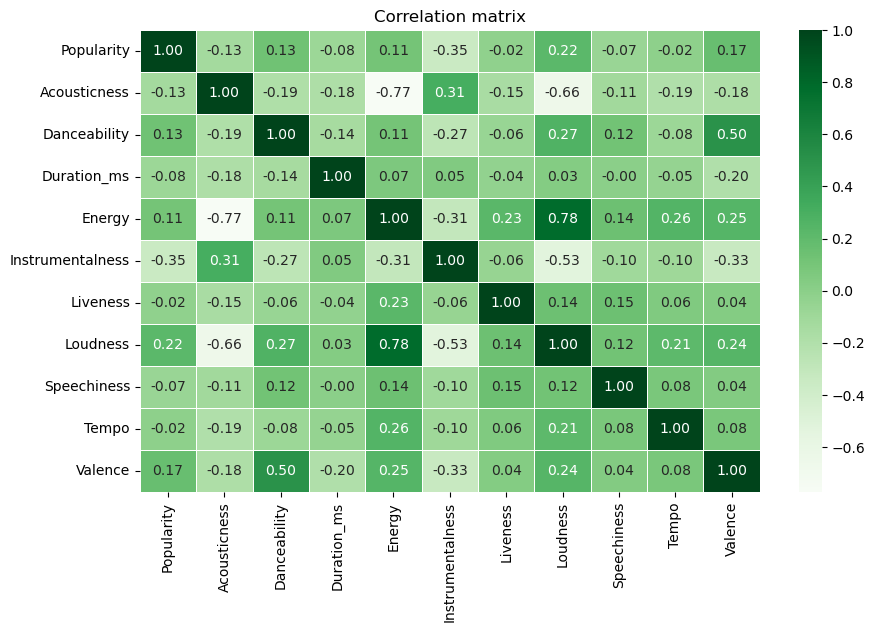

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True, fmt='.2f',cmap='Greens',linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

In [31]:
print("Features having collinearity greater than 0.6")
for i, row in corr.iterrows():
    for col in corr.columns:
        corr_value=row[col]
        if abs(corr_value) > 0.5 and (i!= col and i < col):
            print(f"{i}, {col}: {corr_value}")
        else:
            continue

Features having collinearity greater than 0.6
Acousticness, Energy: -0.7734411569480996
Acousticness, Loudness: -0.6568653006988825
Danceability, Valence: 0.5023430387823572
Energy, Loudness: 0.784360806624906
Instrumentalness, Loudness: -0.5269294347100901


From above we can see that,   
Loudness and acousticness are having multicollinearity so we will be dropping loudness and acousticness.

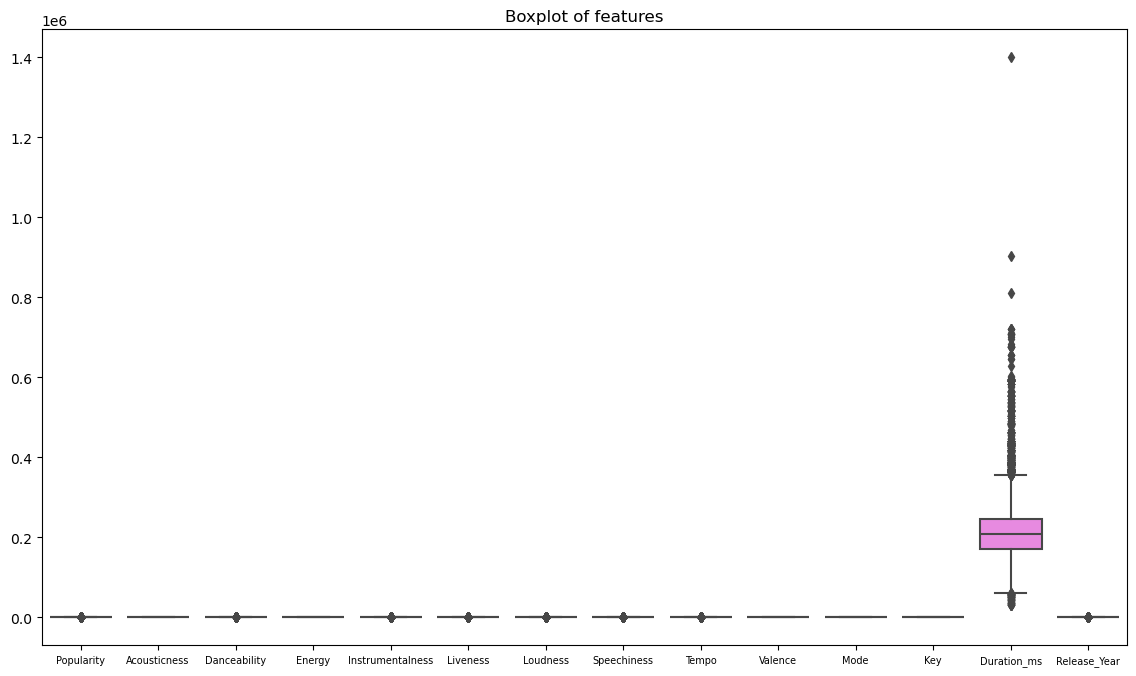

In [77]:
plt.figure(figsize=(14,8))
sns.boxplot(df)
plt.xticks(fontsize=7)
plt.title('Boxplot of features')
plt.show()

As we can see from above, the duration_ms is the only feature having outliers.It could be because of scaling as the values are on large scale. Hence we are ignoring it for now.

In [78]:
df.columns

Index(['Name', 'Artist', 'Genre', 'Popularity', 'Acousticness', 'Danceability',
       'Energy', 'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness',
       'Tempo', 'Valence', 'Mode', 'Key', 'Duration_ms', 'release_date',
       'Release_Year'],
      dtype='object')

# Data Preprocessing:

In [13]:
df[df[['Name','Artist','Genre']].duplicated()]

,Name,Artist,Genre,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Mode,Key,Duration_ms,release_date,Release_Year
37,Hold On,Chord Overstreet,acoustic,77,0.46900,0.618,0.443,0.000000,0.0829,-9.681,0.0526,119.949,0.167,1,2,198853,2017-02-03,2017
38,Love Song,Sara Bareilles,acoustic,73,0.02080,0.583,0.786,0.000000,0.1880,-3.142,0.0301,123.055,0.573,0,2,258826,2007-07-03,2007
39,I Won't Give Up,Jason Mraz,acoustic,67,0.69400,0.483,0.303,0.000000,0.1150,-10.058,0.0429,133.406,0.139,1,4,240165,2012-04-13,2012
40,Blister In The Sun,Violent Femmes,acoustic,71,0.31600,0.726,0.537,0.000000,0.0707,-8.896,0.1140,96.889,0.882,1,0,145706,1983-01-01,1983
42,Naked as We Came,Iron & Wine,acoustic,67,0.65300,0.386,0.205,0.044800,0.1060,-16.699,0.0366,172.373,0.623,1,4,152613,2004-03-23,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13786,Pump It Louder,Tiësto,trance,63,0.00789,0.660,0.942,0.000018,0.8340,-2.273,0.1850,126.017,0.543,1,4,158571,2022-10-07,2022
13787,My City (feat. Katy Tiz),Tiësto,trance,59,0.00169,0.668,0.943,0.548000,0.1300,-3.375,0.0498,128.011,0.195,1,2,151874,2024-05-15,2024
13788,Alone In A Room,Asking Alexandria,trance,63,0.00251,0.482,0.946,0.000000,0.0466,-3.230,0.0852,135.071,0.284,0,4,245861,2017-12-15,2017
13790,Don't Be Shy,Tiësto,trance,66,0.19800,0.770,0.787,0.000000,0.2620,-3.748,0.0583,119.986,0.513,0,11,140500,2023-04-21,2023


In [28]:
#dropping duplicates
df_cleaned = df.drop_duplicates(subset=['Name', 'Artist'])
df_cleaned=df_cleaned.reset_index()

In [29]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3635 entries, 0 to 3634
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             3635 non-null   int64         
 1   Name              3635 non-null   object        
 2   Artist            3635 non-null   object        
 3   Genre             3635 non-null   object        
 4   Popularity        3635 non-null   int64         
 5   Acousticness      3635 non-null   float64       
 6   Danceability      3635 non-null   float64       
 7   Energy            3635 non-null   float64       
 8   Instrumentalness  3635 non-null   float64       
 9   Liveness          3635 non-null   float64       
 10  Loudness          3635 non-null   float64       
 11  Speechiness       3635 non-null   float64       
 12  Tempo             3635 non-null   float64       
 13  Valence           3635 non-null   float64       
 14  Mode              3635 n

In [30]:
# Dropiing Loudness and acousticness as per previous analysis for multi- collinearity
df_cleaned=df_cleaned.drop(['Loudness','Acousticness','index','release_date','Release_Year','Instrumentalness'], axis=1)

### Data transformation:

In [31]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3635 entries, 0 to 3634
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          3635 non-null   object 
 1   Artist        3635 non-null   object 
 2   Genre         3635 non-null   object 
 3   Popularity    3635 non-null   int64  
 4   Danceability  3635 non-null   float64
 5   Energy        3635 non-null   float64
 6   Liveness      3635 non-null   float64
 7   Speechiness   3635 non-null   float64
 8   Tempo         3635 non-null   float64
 9   Valence       3635 non-null   float64
 10  Mode          3635 non-null   int64  
 11  Key           3635 non-null   int64  
 12  Duration_ms   3635 non-null   int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 369.3+ KB


In [33]:
scaler=StandardScaler()
standardized=scaler.fit_transform(df_cleaned[['Popularity', 'Danceability',
       'Duration_ms', 'Energy', 'Liveness',
       'Speechiness', 'Tempo', 'Valence']])

sd_df = pd.DataFrame(standardized, columns=['Popularity', 'Danceability',
        'Energy', 'Liveness', 
       'Speechiness', 'Tempo', 'Valence','Duration_ms'])


In our model, StandardScaler is preferred because it ensures that all features contribute equally to the clustering process by standardizing them to have a mean of 0 and variance of 1. This prevents any single feature from dominating due to its scale, which is critical in algorithms like K-Means that rely on distance calculations.

In [34]:
# Concatenating the transformed columns to the categorical columns
transformed_df=pd.concat([df_cleaned[['Name','Genre','Artist','Mode','Key']],sd_df],axis=1)

# Transforming the text columns to numeric:
encoder=LabelEncoder()
transformed_df['Genre']=encoder.fit_transform(transformed_df['Genre'])
transformed_df['Artist']=encoder.fit_transform(transformed_df['Artist'])

# Converting the name column values to lower case
transformed_df['Name']= [x.lower() for x in transformed_df['Name']]

In [35]:
transformed_df.head()

,Name,Genre,Artist,Mode,Key,Popularity,Danceability,Energy,Liveness,Speechiness,Tempo,Valence,Duration_ms
0,blister in the sun,0,1554,1,0,0.753897,0.836503,-0.833970,-0.371914,-0.742964,0.325874,-0.840646,1.480190
1,love song,0,1204,0,2,0.868316,0.059062,0.464556,0.577851,-0.011538,-0.572295,0.023950,0.325513
2,hold on,0,272,1,2,1.097156,0.249345,-0.223885,-0.730460,-0.666890,-0.331428,-0.078681,-1.191635
3,you are the best thing,0,1126,1,10,0.525057,0.031879,0.154779,0.352806,-0.111306,-0.539109,1.594734,1.491401
4,i won't give up,0,658,1,4,0.525057,-0.484602,0.250343,-1.264465,-0.466730,-0.435268,0.365975,-1.296266


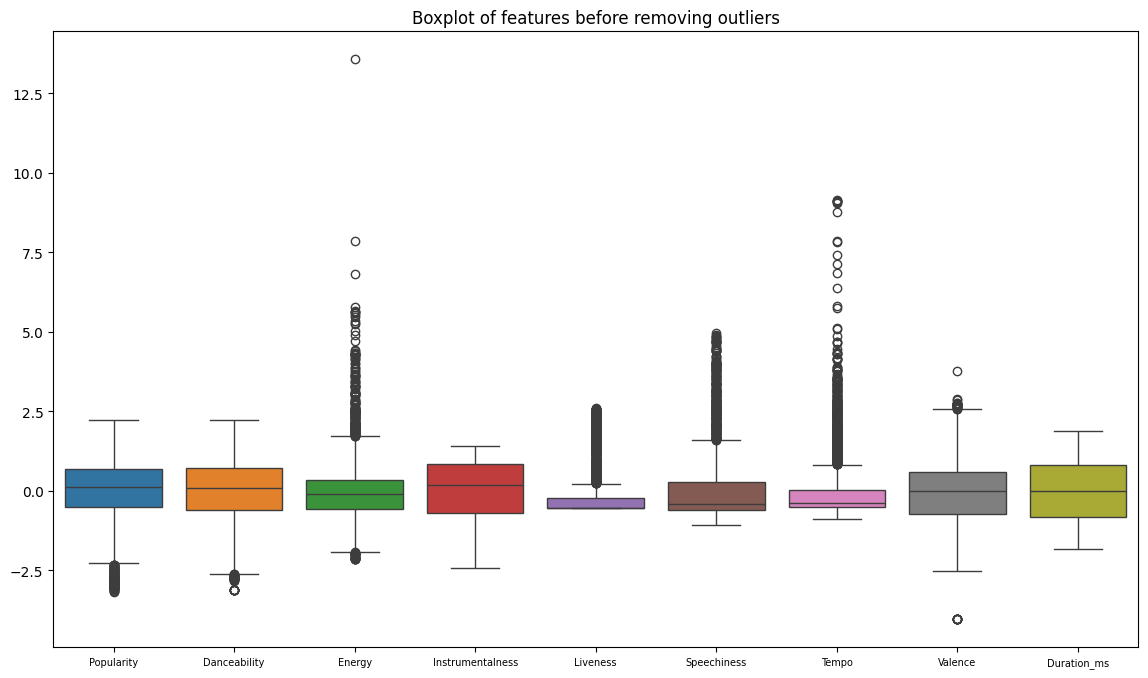

In [13]:
# checking for outliers after standardizing 
plt.figure(figsize=(14,8))
sns.boxplot(sd_df)
plt.xticks(fontsize=7)
plt.title('Boxplot of features before removing outliers')
plt.show()

#### Dropping outliers

In [36]:
# Converting the name column values to lower case
transformed_df['Name']= [x.lower() for x in transformed_df['Name']]

threshold=3

zscores= np.abs(transformed_df.iloc[:,5:].apply(zscore))
# Filter the DataFrame to exclude rows with any z-score above the threshold
filtered_df = transformed_df[(zscores < threshold).all(axis=1)]

filtered_df=filtered_df.reset_index()

filtered_df=filtered_df.drop(['index'],axis=1)

In [37]:
# View the filtered data
print(filtered_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3374 entries, 0 to 3373
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          3374 non-null   object 
 1   Genre         3374 non-null   int64  
 2   Artist        3374 non-null   int64  
 3   Mode          3374 non-null   int64  
 4   Key           3374 non-null   int64  
 5   Popularity    3374 non-null   float64
 6   Danceability  3374 non-null   float64
 7   Energy        3374 non-null   float64
 8   Liveness      3374 non-null   float64
 9   Speechiness   3374 non-null   float64
 10  Tempo         3374 non-null   float64
 11  Valence       3374 non-null   float64
 12  Duration_ms   3374 non-null   float64
dtypes: float64(8), int64(4), object(1)
memory usage: 342.8+ KB
None


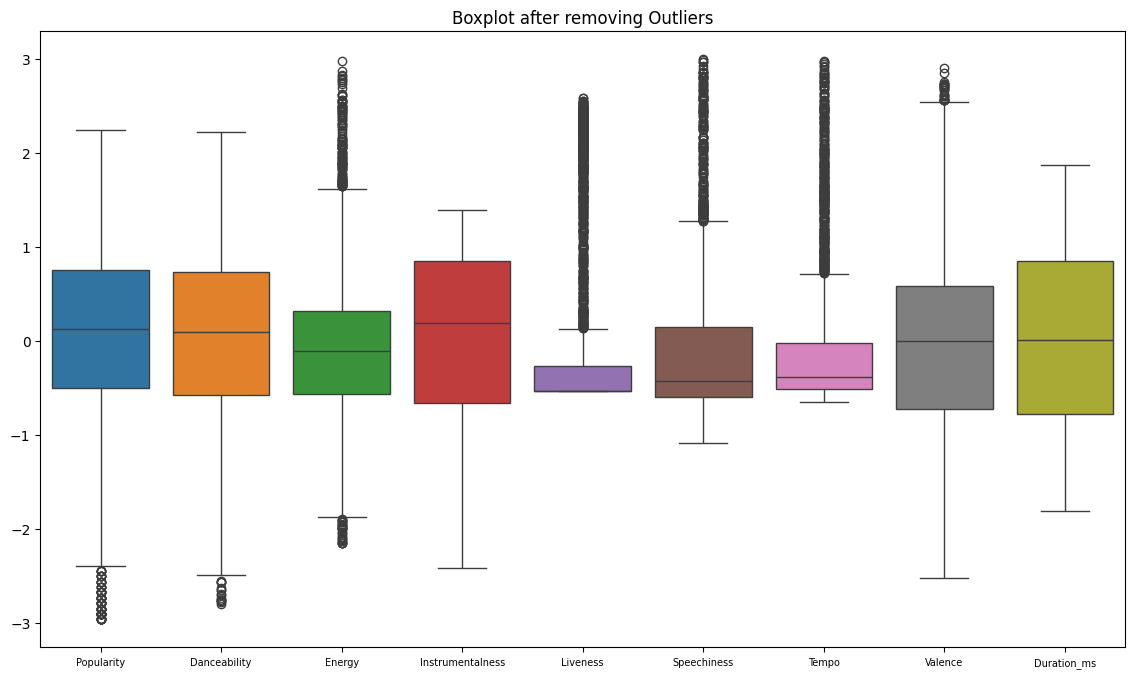

In [24]:
plt.figure(figsize=(14,8))
sns.boxplot(filtered_df.iloc[:,5:])
plt.xticks(fontsize=7)
plt.title('Boxplot after removing Outliers')
plt.show()

# Clustering

### Kmeans:

In [38]:
inertia=[]
silhouette=[]
k= list(range(2,50))
for i in k:
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(filtered_df.iloc[:,1:])
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(filtered_df.iloc[:,1:],kmeans.labels_))
    print(f'K:{i} "Silhouette:"{silhouette_score(filtered_df.iloc[:,1:],kmeans.labels_)} Inertia:{kmeans.inertia_}' )

K:2 "Silhouette:"0.6328621148969418 Inertia:192232519.9653872
K:3 "Silhouette:"0.5834537089786308 Inertia:87194357.22698876
K:4 "Silhouette:"0.5570162306883871 Inertia:50139798.73336935
K:5 "Silhouette:"0.535049882138627 Inertia:33151743.676291004
K:6 "Silhouette:"0.5188381035072053 Inertia:24218611.632543918
K:7 "Silhouette:"0.4953762725845228 Inertia:18834079.849634733
K:8 "Silhouette:"0.4889561228195513 Inertia:15246314.413983671
K:9 "Silhouette:"0.4755136631966326 Inertia:12359062.306912867
K:10 "Silhouette:"0.46528151585105537 Inertia:10934247.125610322
K:11 "Silhouette:"0.46391716636381053 Inertia:8989198.739214353
K:12 "Silhouette:"0.4438362656675964 Inertia:8308585.196577487
K:13 "Silhouette:"0.4323678009874438 Inertia:7683228.390073474
K:14 "Silhouette:"0.42622568688634255 Inertia:6846111.053015688
K:15 "Silhouette:"0.4153916634481496 Inertia:6308758.006670074
K:16 "Silhouette:"0.40678905058458154 Inertia:5995899.177713627
K:17 "Silhouette:"0.3989076134333867 Inertia:5812058.8

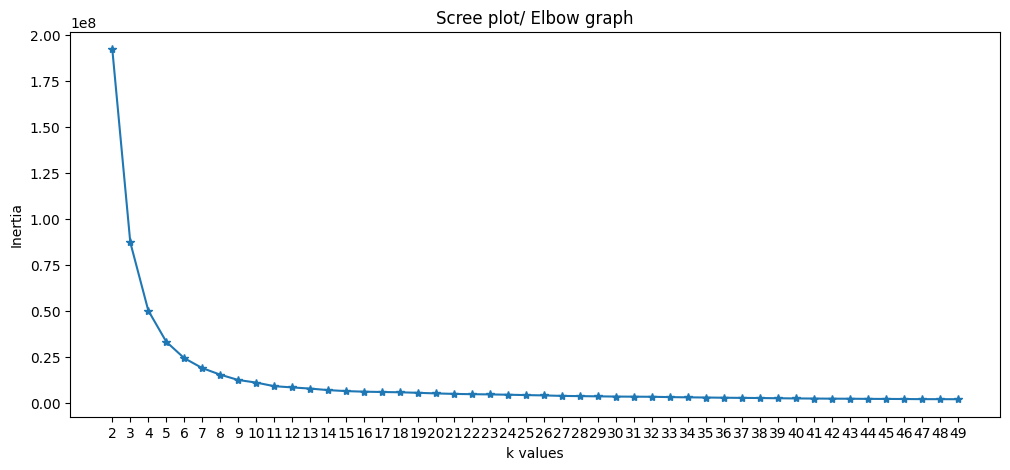

In [18]:
k= list(range(2,50))
plt.figure(figsize=(12,5))
plt.plot(k,inertia,marker='*')
plt.title('Scree plot/ Elbow graph') 
plt.xlabel('k values')
plt.ylabel('Inertia')
plt.xticks(k)
plt.show()

### How to choose the optimal k value:
+ As the number of clusters, the WCSS/inertia typically decreases, because adding more clusters makes it easier to fit the data points closely.
  initially, the WCSS decreases sharply with the increase in the number of clusters.However, after a certain point, the rate of decrease slows down and 
  the curve starts to bend, forming an "elbow."
+ The "elbow" point is where the decrease in WCSS starts to slow down. This is usually considered the optimal number of clusters because adding more
  clusters beyond this point results in only marginal gains in terms of reduced WCSS, potentially leading to overfitting.

+ From above we can see that, around 11 clusters the elbow graph or the descrese in inertia values starts to slow down. Hence K =11 would be the optimal k value.

#### DBSCAN

In [19]:

# Parameters to search
# MinPts >= D+1
params = {'eps': list(np.arange(0.1, 0.9, 0.3)) + list(range(1, 20, 2)),
          'min_samples': [5,10,15,20,25]}

best_score = -1
best_params = {}

# Data for clustering
X = filtered_df.iloc[:, 1:]

# Manual grid search
for eps in params['eps']:
    for min_samples in params['min_samples']:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        
        # Ignore noise points (label = -1) for silhouette score
        if len(set(labels)) > 1 and len(set(labels)) != 1 + (labels == -1).sum():  # Ensures that there are more than 1 clusters
            score = silhouette_score(X, labels)
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}
                

print(f"Best Silhouette Score: {best_score}")
print(f"Best Parameters: {best_params}")

Best Silhouette Score: 0.15145036630721959
Best Parameters: {'eps': 11, 'min_samples': 5}


#### The silhouette score is very poor so we will not be considering DBSCAN.

### Applying PCA- Principal Component Analysis:

In [20]:

pca=PCA()
pca_components= pca.fit_transform(filtered_df.iloc[:,1:])
pca_components= pd.DataFrame(pca_components)

# preview of the PC's
pca_components

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,744.450242,-45.242119,-5.259113,-1.233196,-1.685607,0.026880,0.269875,-0.260316,0.031584,0.096398,-0.560953,0.761108,0.113017
1,394.449597,-45.068124,-3.284105,-0.792198,0.184607,0.997283,-0.058798,0.326806,0.347768,-0.422578,0.085310,-0.098456,-0.683006
2,-537.550000,-44.585036,-3.474841,0.468818,-0.706478,1.500618,0.745612,0.135257,-0.372221,0.756199,-0.073241,-0.488930,0.388552
3,316.448302,-45.042377,4.664296,-1.346143,0.636870,-0.242827,1.425797,0.330245,0.114778,-0.874552,0.347460,0.383741,0.270920
4,-151.550473,-44.785214,-1.415832,1.152162,-0.137247,1.323315,0.919308,0.311777,-0.900738,0.371227,0.452034,-0.142727,0.269044
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3369,-485.497671,61.363869,5.740167,0.473515,1.016466,-1.068853,-0.870895,-0.007762,2.272860,1.210939,0.076195,-0.780253,-0.077406
3370,-722.495977,61.496489,-3.374000,-1.572689,0.284748,-1.214878,-0.358917,-0.848446,0.036446,-1.066352,0.056887,-0.362791,0.268862
3371,677.503935,60.784650,-4.073706,0.334338,0.916883,-0.608462,-0.846654,0.899644,1.458012,0.900594,-0.478318,0.036464,0.537513
3372,-722.495986,61.493691,-3.349772,-1.182052,0.179884,-1.650494,-0.725309,1.062326,-0.556441,-0.545277,-0.575698,-0.478547,0.321753


In [21]:
# PC's shouldn't be correletaed to each other and we can see below that they aren't correlated.
np.round(pca_components.corr(),4)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0
1,0.0,1.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0
2,-0.0,-0.0,1.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0
3,0.0,0.0,-0.0,1.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
4,-0.0,-0.0,0.0,-0.0,1.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0
5,0.0,0.0,-0.0,0.0,0.0,1.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0
6,-0.0,0.0,-0.0,0.0,0.0,0.0,1.0,-0.0,-0.0,0.0,0.0,0.0,0.0
7,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,1.0,0.0,-0.0,-0.0,0.0,0.0
8,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,1.0,-0.0,-0.0,-0.0,-0.0
9,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,1.0,-0.0,0.0,0.0


In [22]:
variance= pd.DataFrame(pca_components.var(), columns=['Variances'])
variance['Percentages']= pd.Series(pca.explained_variance_ratio_ * 100)
variance['cumsum']= pd.Series(np.cumsum(variance['Percentages']))
variance

,Variances,Percentages,cumsum
0,237803.138407,99.613762,99.613762
1,901.845541,0.377776,99.991537
2,12.581788,0.005270,99.996808
3,1.969252,0.000825,99.997633
4,1.239070,0.000519,99.998152
5,0.983173,0.000412,99.998564
6,0.746039,0.000313,99.998876
7,0.623549,0.000261,99.999137
8,0.564626,0.000237,99.999374
9,0.500714,0.000210,99.999584


#### From above we will be considering first three principal components as these reatain 99.99 % of of variance.

### Clustering- Kmeans- PCA

In [23]:
print("Checking for the optimal k value:")
inertia=[]
silhouette=[]
k= list(range(2,20))
for i in k:
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(pca_components.iloc[:,0:3])
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(pca_components.iloc[:,0:3],kmeans.labels_))
    print(f'K:{i} "Silhouette:"{silhouette_score(pca_components.iloc[:,0:3],kmeans.labels_)} Inertia:{kmeans.inertia_}' )

Checking for the optimal k value:


K:2 "Silhouette:"0.6329204839085952 Inertia:192210351.4404328
K:3 "Silhouette:"0.5835778617017334 Inertia:87173136.85818924
K:4 "Silhouette:"0.5578355096106103 Inertia:50197723.96830512
K:5 "Silhouette:"0.5352796216681602 Inertia:33212706.911447607
K:6 "Silhouette:"0.5193874742313633 Inertia:24202832.148068506
K:7 "Silhouette:"0.49585776897570966 Inertia:18812597.726975303
K:8 "Silhouette:"0.48955912472739566 Inertia:15225634.82219389
K:9 "Silhouette:"0.47639505180142055 Inertia:12340721.884045972
K:10 "Silhouette:"0.46622272990515035 Inertia:10914503.855140071
K:11 "Silhouette:"0.4642127982167981 Inertia:8973692.32038907
K:12 "Silhouette:"0.4442422521611505 Inertia:8302247.239864033
K:13 "Silhouette:"0.4327806535217906 Inertia:7611637.563265527
K:14 "Silhouette:"0.4207675236797591 Inertia:7121221.8828919185
K:15 "Silhouette:"0.4176573432006126 Inertia:6476638.187887055
K:16 "Silhouette:"0.408750841853099 Inertia:5979991.849182414
K:17 "Silhouette:"0.39670439475894137 Inertia:5744811.9

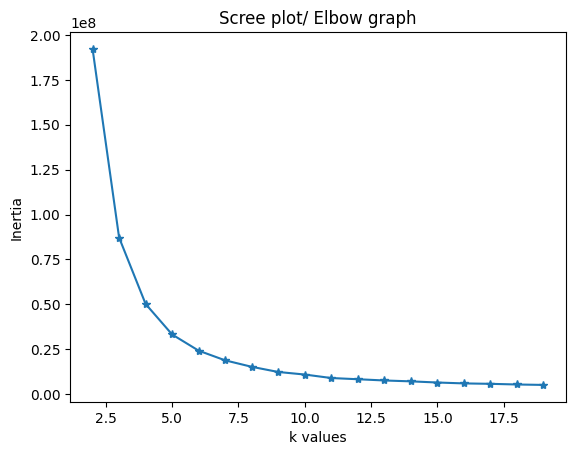

In [24]:
k= list(range(2,20))
plt.plot(k,inertia,marker='*')
plt.title('Scree plot/ Elbow graph') 
plt.xlabel('k values')
plt.ylabel('Inertia')
plt.show()

##### Even with the use of principal components, the optimal value for k is 11, as indicated by the elbow graph where the decrease in inertia begins to slow down at k=11.

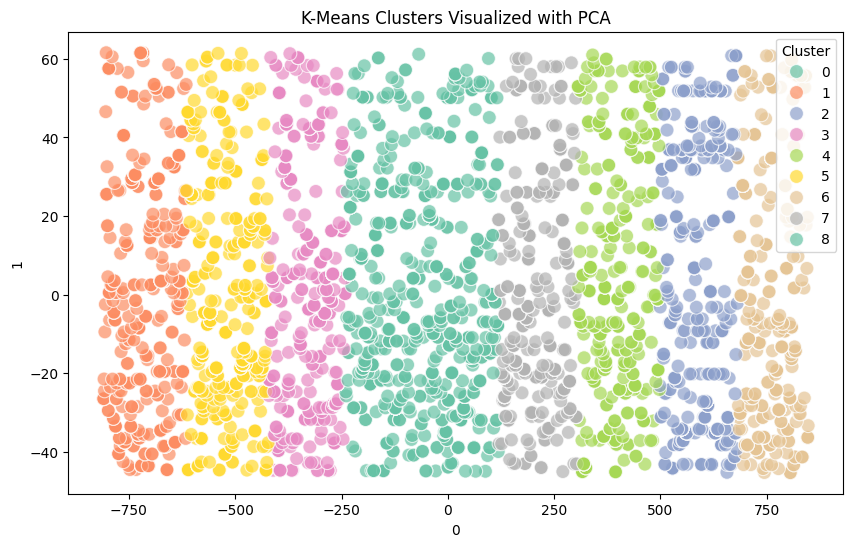

In [25]:
kmeans=KMeans(n_clusters=9,random_state=42)
labels=kmeans.fit_predict(pca_components.iloc[:,0:3])

# Create a DataFrame for the reduced data
df_pca = pd.DataFrame(pca_components.iloc[:,0:3])

# Add the cluster labels
df_pca['Cluster'] = labels

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x=df_pca.iloc[:,0], y=df_pca.iloc[:,1], hue='Cluster', palette='Set2', s=100, alpha=0.7)
plt.title('K-Means Clusters Visualized with PCA')
plt.show()

#### DBSCAN- PCA

In [26]:
# Parameters to search
params = {'eps': list(np.arange(0.1,0.9,0.2)) + list(range(1,20,2)),
          'min_samples': [5, 10, 12, 15, 20]}

best_score = -1
best_params = {}

# Data for clustering
X = pca_components.iloc[:,0:4]

# Manual grid search
for eps in params['eps']:
    for min_samples in params['min_samples']:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        
        # Ignore noise points (label = -1) for silhouette score
        if len(set(labels)) > 1 and len(set(labels)) != 1 + (labels == -1).sum():  # Ensures that there are more than 1 clusters
            score = silhouette_score(X, labels)
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}
                

print(f"Best Silhouette Score: {best_score}")
print(f"Best Parameters: {best_params}")

Best Silhouette Score: 0.12993894515418491
Best Parameters: {'eps': 11, 'min_samples': 5}


##### Still very poor silhouette score.

# Final cluster: Kmeans with k= 11

In [27]:
kmeans=KMeans(n_clusters=10,random_state=42)
Labels=kmeans.fit_predict(filtered_df.iloc[:,1:])

# Silhouette score
print("Silhouette score:",silhouette_score(filtered_df.iloc[:,1:], Labels))

# Add the cluster labels to the original dataset
filtered_df.loc[:, 'Cluster_id'] = Labels

Silhouette score: 0.4651781589035656


In [28]:
filtered_df.loc[:, 'Cluster_id'].value_counts()

Cluster_id
5    451
1    414
3    401
0    337
8    331
7    310
2    306
4    297
9    267
6    260
Name: count, dtype: int64

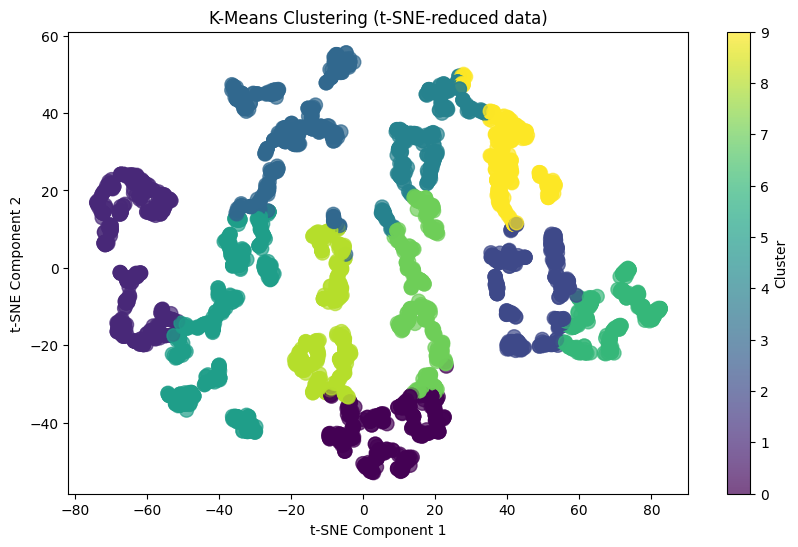

In [29]:
# Reduce dimensions to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(filtered_df.iloc[:, 1:]) 


# Create a DataFrame for t-SNE results
tsne_df = pd.DataFrame(data=X_tsne, columns=['t-SNE1', 't-SNE2'])
tsne_df['Cluster'] = Labels

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(tsne_df['t-SNE1'], tsne_df['t-SNE2'], c=tsne_df['Cluster'], cmap='viridis', s=100, alpha=0.7)
plt.title('K-Means Clustering (t-SNE-reduced data)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [31]:
filtered_df.to_excel('final_tracks.xlsx',index=False)

# Model Building 1

In [32]:
# Function to recommend songs from the same cluster
def recommend_songs(song_name, data, num_recommendations):
    song_name=song_name.lower()
    if song_name in data['Name'].values:
        cluster = data.loc[data['Name'] == song_name, 'Cluster_id'].values[0]
    recommendations = data[(data['Cluster_id'] == cluster) & (data['Name'] != song_name)].sample(num_recommendations)
    return recommendations[['Name']]


recommendations = recommend_songs('hold on',filtered_df,10)
recommendations

,Name
1864,i want you
2524,follow you
96,ain't no rest for the wicked
1858,satellite - tweekacore remix
124,the sound of silence - cyril remix
978,are you dead yet?
2508,limousine (feat. aurora)
1860,so high (feat. meryll)
2967,dancing in the dark
1236,island girl


# Method 2 for recommendation:

## Data extraction using TfidfVectorizer

In [ ]:
transformed_df.columns

Index(['Name', 'Genre', 'Artist', 'Mode', 'Key', 'Popularity', 'Danceability',
       'Energy', 'Instrumentalness', 'Liveness', 'Speechiness', 'Tempo',
       'Valence', 'Duration_ms'],
      dtype='object')

In [ ]:
# Concatenating the transformed columns to the categorical columns
transformed_df=pd.concat([df_cleaned[['Name','Genre','Artist','Mode','Key']],sd_df],axis=1)

# Converting the name column values to lower case
transformed_df['Name']= [x.lower() for x in transformed_df['Name']]

In [ ]:
# removing outliers


threshold=3

zscores= np.abs(transformed_df.iloc[:,5:].apply(zscore))
# Filter the DataFrame to exclude rows with any z-score above the threshold
songs_df = transformed_df[(zscores < threshold).all(axis=1)]

songs_df=songs_df.reset_index()

songs_df=songs_df.drop(['index'],axis=1)

In [ ]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3374 entries, 0 to 3373
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              3374 non-null   object 
 1   Genre             3374 non-null   object 
 2   Artist            3374 non-null   object 
 3   Mode              3374 non-null   int64  
 4   Key               3374 non-null   int64  
 5   Popularity        3374 non-null   float64
 6   Danceability      3374 non-null   float64
 7   Energy            3374 non-null   float64
 8   Instrumentalness  3374 non-null   float64
 9   Liveness          3374 non-null   float64
 10  Speechiness       3374 non-null   float64
 11  Tempo             3374 non-null   float64
 12  Valence           3374 non-null   float64
 13  Duration_ms       3374 non-null   float64
dtypes: float64(9), int64(2), object(3)
memory usage: 369.2+ KB


In [ ]:

# Merging all the text columns
songs_df['Merged_col'] = (songs_df['Name'] + ' ' + songs_df['Artist'] + ' ' + songs_df['Genre'])
#songs_df['Merged_col'] = ( songs_df['Artist'] + ' ' + songs_df['Genre'])


# Removing whitespace or filtering out any empty string
songs_df = songs_df[songs_df['Merged_col'].str.strip() != '']
Merged_data = songs_df['Merged_col']

# Converting to lower case
Merged_data = Merged_data.apply(lambda x: x.lower())

# Create an English language SnowballStemmer object
stemmer = SnowballStemmer("english")

# Define a function to perform both stemming and tokenization
def tokenize_and_stem(text):
    
    # Tokenize by sentence, then by word
    tokens = [word for sentence in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sentence)]

    stop_words= stopwords.words('english')

    no_stopwords_token= [x for x in tokens if x not in stop_words]
    
    # Stem the filtered_tokens
    stems = [stemmer.stem(t) for t in no_stopwords_token]
    
    return stems

In [ ]:
Merged_data

0              blister in the sun violent femmes acoustic
1                       love song sara bareilles acoustic
2                       hold on chord overstreet acoustic
3          you are the best thing ray lamontagne acoustic
4                     i won't give up jason mraz acoustic
                              ...                        
3369               the launch - radio edit dj jean trance
3370    in the dark (feat. aldae) armin van buuren trance
3371                         split (only u) tiësto trance
3372    in the dark (feat. aldae) - extended mix armin...
3373    viva l'opera (asot 1186) [tune of the week] ar...
Name: Merged_col, Length: 3374, dtype: object

In [ ]:
songs_token = []
for i in Merged_data:
    tk = tokenize_and_stem(i)
    songs_token.append(tk)
    print(tk)

['blister', 'sun', 'violent', 'femm', 'acoust']
['love', 'song', 'sara', 'bareill', 'acoust']
['hold', 'chord', 'overstreet', 'acoust']
['best', 'thing', 'ray', 'lamontagn', 'acoust']
['wo', "n't", 'give', 'jason', 'mraz', 'acoust']
['born', 'love', 'ray', 'lamontagn', 'acoust']
['find', 'peopl', 'drew', 'holcomb', '&', 'neighbor', 'acoust']
['nake', 'came', 'iron', '&', 'wine', 'acoust']
['come', 'get', 'higher', 'matt', 'nathanson', 'acoust']
['flightless', 'bird', ',', 'american', 'mouth', 'iron', '&', 'wine', 'acoust']
['call', 'dream', 'iron', '&', 'wine', 'acoust']
['brand', 'new', 'ben', 'rector', 'acoust']
['asleep', 'among', 'endiv', 'ichiko', 'aoba', 'acoust']
['breath', '(', '2', ')', 'anna', 'nalick', 'acoust']
['ingrid', 'michaelson', 'acoust']
['save', 'later', 'eddi', 'vedder', 'acoust']
['stori', 'brandi', 'carlil', 'acoust']
['love', 'kurt', 'cobain', 'acoust']
['window', 'roll', 'amo', 'lee', 'acoust']
['upon', 'dream', 'disney', 'peac', 'guitar', 'acoust']
['babi', '

In [ ]:
# Create a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, max_features=5000, min_df=0.0, 
                                   use_idf=True, ngram_range=(1, 3), tokenizer=tokenize_and_stem,token_pattern=None)

# Fit and transform the Merged_data into a TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(Merged_data)

# The tfidf_matrix is now ready for use

In [ ]:

combined_features = hstack([tfidf_matrix, songs_df[['Popularity', 'Danceability', 'Energy',
       'Instrumentalness', 'Liveness', 'Speechiness', 'Tempo', 'Valence',
       'Mode', 'Key', 'Duration_ms']]])


In [ ]:
# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(combined_features)
cosine_sim

array([[ 1.        ,  0.1111602 ,  0.18940662, ..., -0.08506803,
         0.21730351, -0.1304644 ],
       [ 0.1111602 ,  1.        ,  0.54825198, ...,  0.19023554,
         0.47172478,  0.71488873],
       [ 0.18940662,  0.54825198,  1.        , ...,  0.22302836,
         0.2279464 ,  0.62789138],
       ...,
       [-0.08506803,  0.19023554,  0.22302836, ...,  1.        ,
         0.36084175,  0.44337253],
       [ 0.21730351,  0.47172478,  0.2279464 , ...,  0.36084175,
         1.        ,  0.6268857 ],
       [-0.1304644 ,  0.71488873,  0.62789138, ...,  0.44337253,
         0.6268857 ,  1.        ]])

In [ ]:
sim_df=pd.DataFrame(cosine_sim,columns=songs_df['Name'], index=songs_df['Name'])
# filling the digonal values to sero
np.fill_diagonal(sim_df.values, 0)
sim_df

Name,blister in the sun,love song,hold on,you are the best thing,i won't give up,i was born to love you,find your people,naked as we came,come on get higher,"flightless bird, american mouth",...,tell it to my heart,sorry you're not a winner,take me away (into the night) - vocal radio mix,lose this feeling - dimension remix,greece 2000,the launch - radio edit,in the dark (feat. aldae),split (only u),in the dark (feat. aldae) - extended mix,viva l'opera (asot 1186) [tune of the week]
Name,,,,,,,,,,,,,,,,,,,,,
blister in the sun,0.000000,0.111160,0.189407,0.080902,-0.025722,0.066194,0.193610,0.119893,0.157297,-0.129379,...,-0.031313,0.006851,-0.132371,-0.359641,0.070554,-0.090308,0.277698,-0.085068,0.217304,-0.130464
love song,0.111160,0.000000,0.548252,0.796159,0.633207,0.728920,0.732947,0.579191,0.778220,0.582478,...,0.732760,0.671239,0.695692,-0.007426,0.218091,0.687782,0.537280,0.190236,0.471725,0.714889
hold on,0.189407,0.548252,0.000000,0.605956,0.835635,0.746478,0.694016,0.660028,0.680559,0.773895,...,0.586400,0.585409,0.639933,-0.181810,-0.040289,0.556330,0.190877,0.223028,0.227946,0.627891
you are the best thing,0.080902,0.796159,0.605956,0.000000,0.811579,0.898954,0.873184,0.837640,0.947343,0.745660,...,0.932497,0.890392,0.843623,0.085935,0.348130,0.909084,0.673987,0.332081,0.636065,0.922457
i won't give up,-0.025722,0.633207,0.835635,0.811579,0.000000,0.895299,0.810682,0.832704,0.836126,0.907978,...,0.779594,0.780658,0.776797,-0.100037,0.048191,0.755646,0.329503,0.249789,0.370252,0.837676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
the launch - radio edit,-0.090308,0.687782,0.556330,0.909084,0.755646,0.884631,0.841525,0.673931,0.909387,0.655669,...,0.933096,0.898420,0.853578,0.158933,0.463257,0.000000,0.550154,0.525919,0.543751,0.934490
in the dark (feat. aldae),0.277698,0.537280,0.190877,0.673987,0.329503,0.496534,0.639589,0.475772,0.621919,0.267610,...,0.690499,0.515317,0.528695,0.146613,0.266912,0.550154,0.000000,0.157745,0.768554,0.602631
split (only u),-0.085068,0.190236,0.223028,0.332081,0.249789,0.289195,0.235043,0.130758,0.335459,0.247435,...,0.404335,0.460811,0.346255,0.448202,0.636444,0.525919,0.157745,0.000000,0.360842,0.443373


# Model building 2

In [ ]:
def recommend_songs(song_name, sim_matrix, data,top_n):
    song_name=song_name.lower()
    sim_values=sim_matrix[song_name].values.tolist()
    sim_values=enumerate(sim_values)
    sim_values=sorted(sim_values, key=lambda x: x[1], reverse=True)
    top_n_indices=[x[0] for x in sim_values[0:top_n+1]]
    return data.iloc[top_n_indices,0]

In [ ]:
recommend_songs('hold on', sim_df, songs_df,10)

3116                                           photograph
2711                                            your song
3032                                 can we kiss forever?
445                                            easy on me
821                                         heading south
345     up where we belong - from "an officer and a ge...
723                   lost in the fire (feat. the weeknd)
4                                         i won't give up
54                           someone you loved - acoustic
2870                back to the old house - 2011 remaster
144                         nothing's gonna hurt you baby
Name: Name, dtype: object